<a href="https://colab.research.google.com/github/ybii22/Machine-Learning/blob/main/Week%202/Citarum_Water.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
pip install scikit-learn mglearn pandas matplotlib

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn  # Untuk visualisasi
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report


In [30]:
# Load dataset
file_path = "/content/CitarumWater.csv"
df = pd.read_csv(file_path)

# Cek informasi dataset
print(df.info())
print("\nLima Baris Pertama Dataset:")
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   No             2500 non-null   int64  
 1   NamaSungai     2500 non-null   object 
 2   TitikPantau    2500 non-null   object 
 3   Waktu          2500 non-null   object 
 4   pH             2500 non-null   float64
 5   Temp           2500 non-null   object 
 6   TSS            2500 non-null   float64
 7   DO             2500 non-null   float64
 8   BOD            2500 non-null   float64
 9   COD            2500 non-null   float64
 10  Nitrat         2500 non-null   float64
 11  FecalColiform  2500 non-null   float64
 12  Fosfat         2500 non-null   float64
 13  O2             2500 non-null   object 
 14  IP             2500 non-null   float64
 15  Class          2500 non-null   int64  
dtypes: float64(9), int64(2), object(5)
memory usage: 312.6+ KB
None

Lima Baris Pertama Dataset:
   

In [39]:
# Pilih fitur numerik yang akan digunakan sebagai input model
features = ['pH', 'TSS', 'DO', 'BOD', 'COD', 'Nitrat', 'FecalColiform', 'Fosfat', 'IP']
X = df[features]

# Target label (Class) yang menunjukkan kualitas air
y = df['Class']

# Konversi target ke label numerik (jika bukan angka)
le = LabelEncoder()
y = le.fit_transform(y)

# Split dataset menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalisasi menggunakan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
# Inisialisasi dan latih model Logistic Regression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Prediksi
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilitas positif untuk ROC


In [33]:
y_prob = model.predict_proba(X_test_scaled)  # Ambil semua probabilitas kelas
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average="weighted")


In [34]:
# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')

# Print hasil evaluasi
print(f"Akurasi: {accuracy:.4f}")
print(f"Presisi: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Akurasi: 0.2560
Presisi: 0.6518
Recall: 0.2560
F1 Score: 0.2148
AUC-ROC: 0.4535

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.41      0.63      0.50       196
           2       0.83      0.02      0.03       294
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         4

    accuracy                           0.26       500
   macro avg       0.25      0.13      0.11       500
weighted avg       0.65      0.26      0.21       500



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [35]:
import numpy as np
print(np.unique(y_test))

from sklearn.preprocessing import label_binarize

# Pastikan jumlah kelas sesuai dataset
classes = np.unique(y_train)  # Ambil semua kelas unik dari data training
y_test_binarized = label_binarize(y_test, classes=classes)
y_prob = model.predict_proba(X_test_scaled)  # Probabilitas untuk semua kelas


[1 2 3 4]


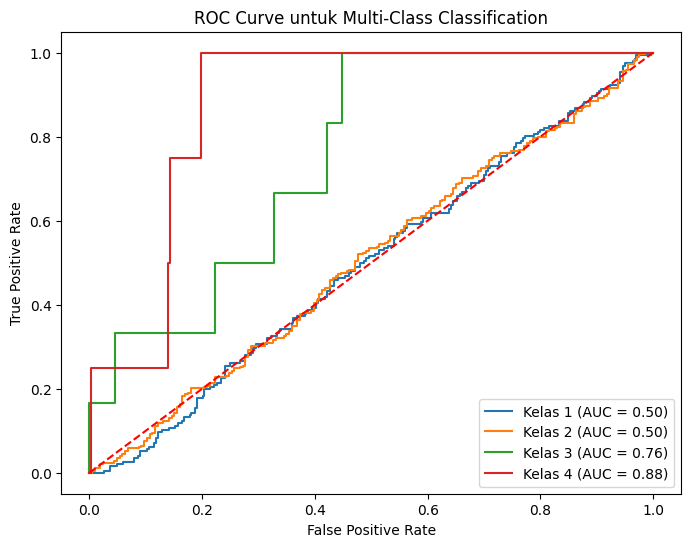

In [36]:
# Plot ROC Curve untuk melihat performa model
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8, 6))

# Loop untuk setiap kelas
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Kelas {classes[i]} (AUC = {roc_auc:.2f})')

# Tambahkan garis diagonal untuk referensi
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

# Label dan judul grafik
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve untuk Multi-Class Classification')
plt.legend()
plt.show()


In [37]:
print(y_train.shape)  # Harusnya (n_samples,)
y_train = y_train.ravel()  # Konversi ke 1D jika perlu

(2000,)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


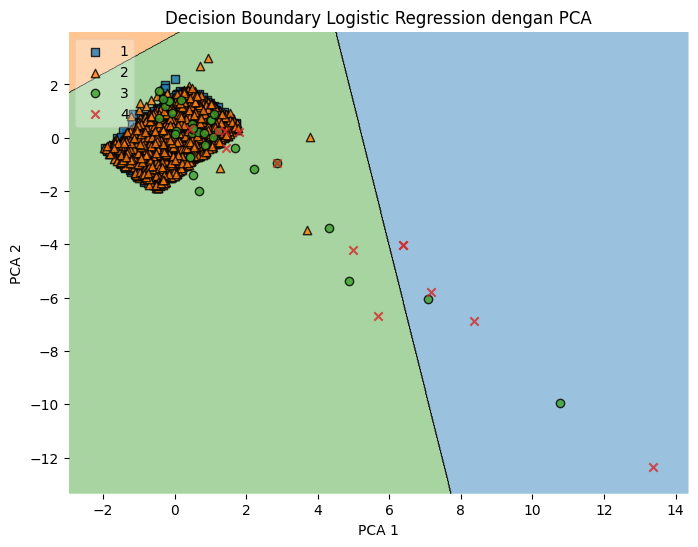

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions

# 1. Load Dataset
df = pd.read_csv("/content/CitarumWater.csv")

# 2. Pilih Fitur yang Dipakai
features = ["pH", "COD"]  # Pilih 2 fitur untuk visualisasi
X = df[features].values
y = df["Class"].values  # Kolom target

# 3. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Normalisasi Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Reduksi Dimensi dengan PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# 6. Train Model Logistic Regression
model = LogisticRegression(multi_class="ovr", max_iter=500)
model.fit(X_train_pca, y_train)

# 7. Plot Decision Boundary menggunakan mlxtend
plt.figure(figsize=(8, 6))
plot_decision_regions(X_train_pca, y_train, clf=model, legend=2)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Decision Boundary Logistic Regression dengan PCA")
plt.show()



## **Matematis**

#### 1. Persamaan Logistic Regression

Logistic Regression digunakan untuk klasifikasi (misalnya: Baik, Sedang, Buruk, Sangat Buruk).
Persamaan dasarnya adalah:

ℎ
𝜃
(
𝑥
)
=
1/
1
+
𝑒
−
(
𝜃
0
+
𝜃
1
𝑥
1
+
𝜃
2
𝑥
2
+
.
.
.
+
𝜃
𝑛
𝑥
𝑛
)
h
θ
​
 (x)=
1+e
−(θ
0
​
 +θ
1
​
 x
1
​
 +θ
2
​
 x
2
​
 +...+θ
n
​
 x
n
​
 )

1
​

Penjelasan Variabel:


*   ℎ
𝜃
(
𝑥
)
= Probabilitas suatu sampel masuk ke kategori tertentu.
*   𝜃
0
= Bias (Intercept).
*   
𝜃
1
,
𝜃
2
,
.
.
.
,
𝜃
𝑛
 = Bobot dari setiap fitur.
*   𝑥
1
,
𝑥
2
,
.
.
.
,
𝑥
𝑛
 = Fitur (contoh: pH, DO, BOD, dll.).
*   Fungsi sigmoid
𝜎
(
𝑧
)
membatasi output ke nilai antara 0 dan 1.


#### 2.  Fungsi Kerugian (Loss Function)
Untuk menentukan seberapa baik modelnya, kita menggunakan log loss (Binary Cross-Entropy):

J(θ)=− 1/m i=1∑m​ [y (i)log(h θ(x (i) ))+(1−y
(i)
 )log(1−h
θ
​
 (x
(i)
 ))]



*   Jika prediksi benar, nilai loss mendekati 0.
*   Jika prediksi salah, nilai loss lebih besar.

untuk multi kelas, menggunakan softmax regression:


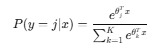

dimana:


*   P(y=j∣x) adalah probabilitas suatu sampel masuk kelas ke-j.
*   K adalah jumlah kelas (misalnya, 4 kelas: Baik, Sedang, Buruk, Sangat Buruk).
*   θ
j
​
  adalah bobot parameter untuk kelas ke-j.


#### 3. ROC Curve dan AUC
ROC (Receiver Operating Characteristic) Curve digunakan untuk mengukur seberapa baik model dapat membedakan antara kelas-kelas.

True Positive Rate (TPR) / Recall

                 TPR= TP/TP+FN
berapa banyak air buruk yang diklasifikasikan dengan benar sebagai buruk.

False Positive Rate (FPR)

                 FPR= FP / FP+TN

berapa banyak air baik yang salah yang diklasifikasikan sebagai buruk.

ROC Curve dibuat dengan plot (FPR vs TPR). Area Under Curve (AUC) mengukur seberapa baik model bekerja:

*   AUC = 1 → Model sempurna.
*   AUC > 0.8 → Model bagus.
*   AUC = 0.5 → Model tidak lebih baik dari tebakan acak.

Multi-class ROC menggunakan metode One-vs-Rest (OvR), dengan:

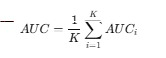

dengan 𝐾 = jumlah kelas.

#### 4. Decision Boundary

Decision boundary adalah garis pemisah antara kelas-kelas berdasarkan probabilitas logistic regression.

Karena Logistic Regression berbasis linear decision boundary, maka garisnya berbentuk:

θ
0
​
 +θ
1
​
 x
1
​
 +θ
2
​
 x
2
​
 =0


Jika dua fitur digunakan (misalnya pH & DO), maka boundary adalah garis lurus.
Jika lebih dari dua fitur, perlu PCA (Principal Component Analysis) untuk mereduksi ke 2D sebelum divisualisasikan.